## Data Ingestion and Preprocessing

In [458]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [459]:
# Loading airbnb data of 8 cities
montreal = pd.read_csv('Dataset/Airbnb/Montreal.csv')
# newbrunswick = pd.read_csv('Dataset/Airbnb/NewBrunswick.csv')
# ottawa = pd.read_csv('Dataset/Airbnb/Ottawa.csv')
# quebeccity = pd.read_csv('Dataset/Airbnb/QuebecCity.csv')
# toronto = pd.read_csv('Dataset/Airbnb/Toronto.csv')
# vancouver = pd.read_csv('Dataset/Airbnb/Vancouver.csv')
# victoria = pd.read_csv('Dataset/Airbnb/Victoria.csv')
# winnipeg = pd.read_csv('Dataset/Airbnb/Winnipeg.csv')


# Adding a City column to each dataframes
montreal['City'] = 'Montreal'
# newbrunswick['City'] = 'New Brunswick'
# ottawa['City'] = 'Ottawa'
# quebeccity['City'] = 'Quebec City'
# toronto['City'] = 'Toronto'
# vancouver['City'] = 'Vancouver'
# victoria['City'] = 'Victoria'
# winnipeg['City'] = 'Winnipeg'

# Merging data from different cities to a single dataframe
airbnb_df = pd.concat([montreal], ignore_index=True)

In [460]:
airbnb_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.140000e+03,8.140000e+03,8.140000e+03,8140.000000,8140.000000,0.0,8140.000000,8140.000000,8140.000000,8136.000000,...,6479.000000,6478.000000,6478.000000,6478.000000,6478.000000,8140.000000,8140.000000,8140.000000,8140.000000,6486.000000
mean,5.356075e+17,2.024032e+13,2.134610e+08,22.481941,34.065356,NaN,45.512912,-73.588256,3.831204,1.206858,...,4.692737,4.814562,4.812302,4.768682,4.624500,15.247666,12.234767,2.945455,0.022973,1.707590
std,4.483384e+17,3.906490e-03,1.878561e+08,54.343251,79.861832,NaN,0.034057,0.046744,2.728670,0.570355,...,0.443670,0.378774,0.382458,0.339030,0.452228,25.751849,23.063491,11.892832,0.418973,2.080059
min,2.905900e+04,2.024032e+13,8.834000e+03,1.000000,1.000000,NaN,45.402833,-73.951287,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.062856e+07,2.024032e+13,3.438248e+07,2.000000,2.000000,NaN,45.494980,-73.600248,2.000000,1.000000,...,4.600000,4.800000,4.790000,4.690000,4.510000,1.000000,1.000000,0.000000,0.000000,0.320000
50%,6.938394e+17,2.024032e+13,1.625797e+08,5.000000,7.000000,NaN,45.513243,-73.576615,3.000000,1.000000,...,4.830000,4.920000,4.920000,4.860000,4.730000,4.000000,3.000000,0.000000,0.000000,1.000000
75%,9.440203e+17,2.024032e+13,4.085429e+08,20.000000,26.000000,NaN,45.530482,-73.562971,4.000000,1.000000,...,4.980000,5.000000,5.000000,5.000000,4.880000,17.000000,12.000000,0.000000,0.000000,2.500000
max,1.118138e+18,2.024032e+13,5.677618e+08,431.000000,599.000000,NaN,45.700282,-73.481630,16.000000,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,116.000000,116.000000,92.000000,10.000000,47.230000


In [461]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8140 entries, 0 to 8139
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8140 non-null   int64  
 1   listing_url                                   8140 non-null   object 
 2   scrape_id                                     8140 non-null   int64  
 3   last_scraped                                  8140 non-null   object 
 4   source                                        8140 non-null   object 
 5   name                                          8140 non-null   object 
 6   description                                   7986 non-null   object 
 7   neighborhood_overview                         4211 non-null   object 
 8   picture_url                                   8140 non-null   object 
 9   host_id                                       8140 non-null   i

In [462]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,29059,https://www.airbnb.com/rooms/29059,20240323015116,2024-03-23,city scrape,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.82,4.68,"267153, expires: 2024-03-31",f,2,2,0,0,2.69,Montreal
1,29061,https://www.airbnb.com/rooms/29061,20240323015116,2024-03-23,city scrape,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,NaN,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,...,4.87,4.73,"267153, expires: 2024-03-31",f,2,2,0,0,0.88,Montreal
2,36301,https://www.airbnb.com/rooms/36301,20240323015116,2024-03-23,city scrape,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",The neighborhood is very lively while the stre...,https://a0.muscache.com/pictures/26c20544-475f...,381468,...,4.88,4.76,NaN,f,3,3,0,0,0.47,Montreal
3,38118,https://www.airbnb.com/rooms/38118,20240323015116,2024-03-23,city scrape,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,NaN,https://a0.muscache.com/pictures/213997/763ec1...,163569,...,4.63,4.38,NaN,f,1,0,1,0,0.10,Montreal
4,50479,https://www.airbnb.com/rooms/50479,20240323015116,2024-03-23,city scrape,L'Arcade Douce,The appartement is sunny and ideally situated ...,Our area is full of life (but our street is qu...,https://a0.muscache.com/pictures/miso/Hosting-...,231694,...,4.84,4.93,"271530, expires: 2024-04-30",t,2,1,1,0,1.60,Montreal


In [463]:
airbnb_df.isnull().sum().sort_values(ascending=False)

calendar_updated                8140
neighbourhood_group_cleansed    8140
host_neighbourhood              4904
license                         4033
host_about                      3967
                                ... 
amenities                          0
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             0
City                               0
Length: 76, dtype: int64

In [464]:
#Cleaning the price column and converting it to float type
airbnb_df['price'] = airbnb_df['price'].str.replace('[$,]', '', regex=True).astype(float)

The prices for the listings in the dataset are greatly skewed to the right as shown below. This causes a non-linear relationship between the price and features.

<Axes: >

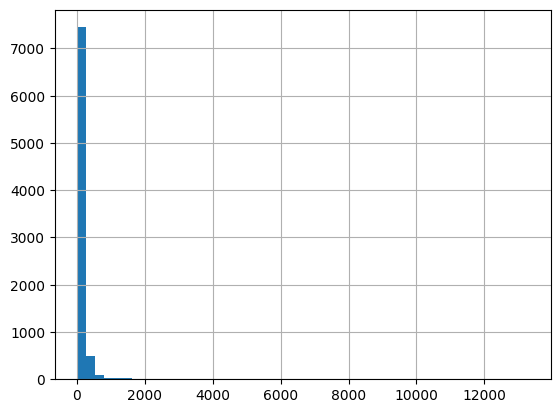

In [465]:
airbnb_df['price'].hist(bins=50)

We take the natural logarithm of the price to make the effective relationship non-linear, while still preserving the linear model. This will be very important when testing different regression models. The results of this are shown below.

<Axes: >

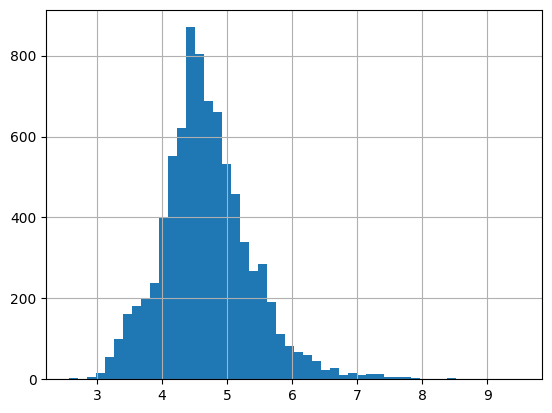

In [466]:
airbnb_df['price'] = np.log(airbnb_df['price'])

airbnb_df['price'].hist(bins=50)

## Data Preprocessing

#### Initial Feature Elimination

In [467]:
airbnb_df = airbnb_df.drop_duplicates()

First, we manually eliminated some features that were unnecessary. The features removed were id, listing_url, scrape_id, last_scraped, source, picture_url, host_id, host_url, host_thumbnail_url, host_picture_url, calendar_updated, and calendar_last_scraped.

In [468]:
airbnb_df = airbnb_df.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_updated', 'calendar_last_scraped'], axis=1)

Secondly, we eliminate many location-related columns since many of them are duplicated, and are mostly filled with null values.

In [469]:
airbnb_df = airbnb_df.drop(columns=['neighbourhood_group_cleansed', 'host_neighbourhood', 'host_location', 'neighbourhood', 'review_scores_location'], axis=1)

Thirdly, we eliminate redundant columns.

In [470]:
airbnb_df = airbnb_df.drop(columns=['bathrooms_text'], axis=1)

Finally, eliminating host about and neighbourhood about because of language challenges.

In [471]:
airbnb_df = airbnb_df.drop(columns=['host_about', 'neighborhood_overview'], axis=1)

#### Handling missing values

In [472]:
airbnb_df.isnull().sum().sort_values(ascending=False)

license                                         4033
review_scores_communication                     1662
review_scores_accuracy                          1662
review_scores_checkin                           1662
review_scores_value                             1662
review_scores_cleanliness                       1661
reviews_per_month                               1654
first_review                                    1654
last_review                                     1654
review_scores_rating                            1653
host_response_time                               864
host_response_rate                               864
host_acceptance_rate                             670
description                                      154
has_availability                                  53
host_is_superhost                                 33
price                                             16
beds                                              10
bedrooms                                      

The null in license column means that the listing doesn't have any license, so filled the column with said information.

In [473]:
airbnb_df['license'].fillna('Unlicensed', inplace=True)

Using K-nn to fill the floating point null values in the dataset since it suitable when the missing data exhibits the “Missing Completely at Random” (MCAR) or “Missing at Random” (MAR) patterns. This effectively implies that causes of the missing data are unrelated to the data.

In [474]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Preparing numerical float data for KNN
numerical_float_columns = airbnb_df.select_dtypes(include=[np.number, 'float']).columns.to_list()
selected_data = airbnb_df[numerical_float_columns]

# Perform k-NN imputation on the DataFrame
imputed_data = knn_imputer.fit_transform(selected_data)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numerical_float_columns)

# Display the DataFrame with filled missing values
imputed_df.head()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,2.0,45.51939,-73.56482,4.0,1.0,1.0,3.0,5.099866,2.0,...,4.79,4.62,4.81,4.77,4.68,2.0,2.0,0.0,0.0,2.69
1,2.0,2.0,45.51929,-73.56493,4.0,1.0,2.0,2.0,5.855072,2.0,...,4.85,4.66,4.88,4.81,4.73,2.0,2.0,0.0,0.0,0.88
2,8.0,11.0,45.53026,-73.58413,2.0,1.0,1.0,2.0,5.164786,32.0,...,4.88,4.86,4.92,4.90,4.76,3.0,3.0,0.0,0.0,0.47
3,1.0,3.0,45.52699,-73.55840,1.0,1.0,3.0,4.0,3.912023,31.0,...,4.56,4.25,4.81,4.81,4.38,1.0,0.0,1.0,0.0,0.10
4,2.0,3.0,45.54157,-73.60737,3.0,1.0,2.0,2.0,4.499810,3.0,...,4.96,4.94,4.97,4.98,4.93,2.0,1.0,1.0,0.0,1.60


In [475]:
# Replace the original columns in airbnb_df with the imputed ones
airbnb_df[numerical_float_columns] = imputed_df

# Display the DataFrame with filled missing values
airbnb_df.head()

,name,description,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,Maryline,2010-05-14,within an hour,100%,98%,f,2.0,2.0,...,4.77,4.68,"267153, expires: 2024-03-31",f,2.0,2.0,0.0,0.0,2.69,Montreal
1,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,Maryline,2010-05-14,within an hour,100%,98%,f,2.0,2.0,...,4.81,4.73,"267153, expires: 2024-03-31",f,2.0,2.0,0.0,0.0,0.88,Montreal
2,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",Sylvie,2011-02-07,within a few hours,94%,80%,t,8.0,11.0,...,4.90,4.76,Unlicensed,f,3.0,3.0,0.0,0.0,0.47,Montreal
3,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,M.,2010-07-11,within a few hours,78%,0%,f,1.0,3.0,...,4.81,4.38,Unlicensed,f,1.0,0.0,1.0,0.0,0.10,Montreal
4,L'Arcade Douce,The appartement is sunny and ideally situated ...,Noemie,2010-09-11,within an hour,100%,100%,t,2.0,3.0,...,4.98,4.93,"271530, expires: 2024-04-30",t,2.0,1.0,1.0,0.0,1.60,Montreal


Replacing null values in host_response_rate and host_response_time with median values so that it doen't impact its relation with price column and isn't affected by outlier much.

In [476]:
airbnb_df['host_response_time'].fillna(airbnb_df['host_response_time'].mode()[0], inplace=True)
airbnb_df['host_response_rate'].fillna(airbnb_df['host_response_rate'].mode()[0], inplace=True)

review_scores related features are features where having a missing value still provided valuable information. Having a missing value meant that there were no reviews for the Airbnb listing. We elected to handle this by dropping all the rows with missing values for first_review. We had to drop these rows to preserve the linearity of the relationship between review_scores_rating and price. If we gave them all a default value of something else, the relation between the data would change.

Similarly, removing rows with null values in other columns as well since the number is low, and filling them with default values may hinder the relationship with price.

In [477]:
airbnb_df = airbnb_df.dropna(subset=['first_review'])
airbnb_df = airbnb_df.dropna(subset=['host_acceptance_rate'])
airbnb_df = airbnb_df.dropna(subset=['description'])
airbnb_df = airbnb_df.dropna(subset=['host_is_superhost'])
airbnb_df = airbnb_df.dropna(subset=['has_availability'])

In [478]:
airbnb_df.isnull().sum().sort_values(ascending=False)

name                                            0
description                                     0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
first_review                                    0
last_review                                     0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_value                             0


In [479]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 8123
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          6017 non-null   object 
 1   description                                   6017 non-null   object 
 2   host_name                                     6017 non-null   object 
 3   host_since                                    6017 non-null   object 
 4   host_response_time                            6017 non-null   object 
 5   host_response_rate                            6017 non-null   object 
 6   host_acceptance_rate                          6017 non-null   object 
 7   host_is_superhost                             6017 non-null   object 
 8   host_listings_count                           6017 non-null   float64
 9   host_total_listings_count                     6017 non-null   float6

Data preprocessing

One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example Male and Female mapped to 0 and 1. But this can add bias in our model as it will start giving higher preference to the Female parameter as 1>0 but ideally, both labels are equally important in the dataset. To deal with this issue we will use the One Hot Encoding technique.https://www.geeksforgeeks.org/ml-one-hot-encoding/

In [480]:
#list all the categorical columns
categorical_columns = airbnb_df.select_dtypes(include=['object']).columns.to_list()

# Display the categorical columns
categorical_columns

['name',
 'description',
 'host_name',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'amenities',
 'has_availability',
 'first_review',
 'last_review',
 'license',
 'instant_bookable',
 'City']

In [481]:
#Converting the first_review and last_review columns extract the date from the current date
airbnb_df['first_review'] = pd.to_datetime(airbnb_df['first_review'])
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
airbnb_df['host_since'] = pd.to_datetime(airbnb_df['host_since'])

# Extract the current date
current_date = pd.to_datetime('2021-07-01')

# Calculate the difference in days between the current date and the first review
airbnb_df['days_since_first_review'] = (current_date - airbnb_df['first_review']).dt.days

# Calculate the difference in days between the current date and the last review
airbnb_df['days_since_last_review'] = (current_date - airbnb_df['last_review']).dt.days

airbnb_df['days_since_host_since'] = (current_date - airbnb_df['host_since']).dt.days

# Drop the first_review and last_review columns
airbnb_df = airbnb_df.drop(columns=['first_review', 'last_review','host_since'], axis=1)


In [482]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = airbnb_df.select_dtypes(include=['object']).columns.tolist()

#Remove amenities and host verifications and host_since as from filtered_categorical_columns
categorical_columns.remove('amenities')
categorical_columns.remove('host_verifications')
# categorical_columns.remove('host_since')
categorical_columns.remove('host_response_rate')
categorical_columns.remove('host_acceptance_rate')

print(categorical_columns)


#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(airbnb_df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
cleaned_df = pd.concat([airbnb_df, one_hot_df], axis=1)

# Drop the original categorical columns
cleaned_df = airbnb_df.drop(categorical_columns, axis=1)

# df_encoded.dropna()
cleaned_df

['name', 'description', 'host_name', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'has_availability', 'license', 'instant_bookable', 'City']


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first_review,days_since_last_review,days_since_host_since
0,100%,98%,2.0,2.0,"['phone', 'work_email']",45.519390,-73.564820,4.0,1.0,1.0,...,4.77,4.68,2.0,2.0,0.0,0.0,2.69,4029,-989,4066
1,100%,98%,2.0,2.0,"['phone', 'work_email']",45.519290,-73.564930,4.0,1.0,2.0,...,4.81,4.73,2.0,2.0,0.0,0.0,0.88,3416,-963,4066
2,94%,80%,8.0,11.0,"['email', 'phone']",45.530260,-73.584130,2.0,1.0,1.0,...,4.90,4.76,3.0,3.0,0.0,0.0,0.47,2229,-920,3797
3,78%,0%,1.0,3.0,"['email', 'phone']",45.526990,-73.558400,1.0,1.0,3.0,...,4.81,4.38,1.0,0.0,1.0,0.0,0.10,3603,-424,4008
4,100%,100%,2.0,3.0,"['email', 'phone']",45.541570,-73.607370,3.0,1.0,2.0,...,4.98,4.93,2.0,1.0,1.0,0.0,1.60,3923,-991,3946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,100%,100%,6.0,17.0,"['email', 'phone']",45.495800,-73.582130,2.0,2.0,1.0,...,5.00,5.00,6.0,2.0,4.0,0.0,1.00,-990,-990,1886
8044,100%,99%,20.0,34.0,"['email', 'phone']",45.546685,-73.554176,10.0,2.0,3.0,...,5.00,5.00,9.0,9.0,0.0,0.0,1.00,-990,-990,-978
8050,100%,100%,10.0,11.0,"['email', 'phone']",45.557890,-73.569275,2.0,1.0,1.0,...,4.00,5.00,9.0,0.0,9.0,0.0,1.00,-990,-990,584
8054,100%,100%,4.0,4.0,"['email', 'phone']",45.544010,-73.546888,6.0,1.0,2.0,...,5.00,5.00,2.0,2.0,0.0,0.0,2.00,-989,-990,-566


In [483]:
#change amenities to onehot

#Change it to the list
cleaned_df['amenities'] = cleaned_df['amenities'].apply(eval)

# Extract unique items from the list in the 'amenities' column
unique_items = set(item for sublist in cleaned_df['amenities'] for item in sublist)

print(unique_items)
print(len(unique_items))

#Apply one hot encoding to the unique_items and create a new column for each item
for item in unique_items:
    cleaned_df[item] = cleaned_df['amenities'].apply(lambda x: 1 if item in x else 0)

# Drop the original amenities column
cleaned_df.drop('amenities', axis=1, inplace=True)

cleaned_df

{'46" HDTV with Netflix, Roku', 'Self check-in', 'HDTV with Roku, Amazon Prime Video, Netflix', 'Fast wifi – 532 Mbps', '42" HDTV with Apple TV', 'Dial conditioner', '55" HDTV with Disney+, Chromecast, Amazon Prime Video, Apple TV, Netflix', '65" HDTV with Amazon Prime Video, Apple TV, Chromecast, Netflix', 'Body wash body soap', 'Fast wifi – 389 Mbps', 'Microwave', 'Shared outdoor pool - lap pool, olympic-sized', '40" HDTV with Netflix, Roku', 'Garnier conditioner', 'Electrolux stainless steel electric stove', 'Game console: Nintendo Switch and PS4', '55" HDTV with Amazon Prime Video, Apple TV, Chromecast, Disney+, Fire TV, HBO Max, Hulu, Netflix, premium cable, Roku, standard cable', 'TV with Roku, Netflix', 'Wifi – 32 Mbps', 'Free parking on premises – 1 space', 'Fast wifi – 76 Mbps', 'Divers body soap', 'HDTV with standard cable, Fire TV, Netflix', '55" HDTV with Amazon Prime Video, Netflix, standard cable', '40" TV', 'Head & Shoulders 2-in-1 conditioner', 'HDTV with Amazon Prime V

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,...,"32"" HDTV with Netflix, Roku",Frigidaire stainless steel oven,Live clean conditioner,City skyline view,"50"" HDTV with Amazon Prime Video, Apple TV, Disney+, Fire TV, HBO Max, Hulu, Netflix, premium cable, standard cable",Petit réfrigérateur hauteur comptoir / mini fridge (counter height) refrigerator,"43"" HDTV with Fire TV, Netflix",Game console: PS4,Paid parking lot on premises – 100 spaces,L'oreal shampoo
0,100%,98%,2.0,2.0,"['phone', 'work_email']",45.519390,-73.564820,4.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,100%,98%,2.0,2.0,"['phone', 'work_email']",45.519290,-73.564930,4.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,94%,80%,8.0,11.0,"['email', 'phone']",45.530260,-73.584130,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,78%,0%,1.0,3.0,"['email', 'phone']",45.526990,-73.558400,1.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,100%,100%,2.0,3.0,"['email', 'phone']",45.541570,-73.607370,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,100%,100%,6.0,17.0,"['email', 'phone']",45.495800,-73.582130,2.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8044,100%,99%,20.0,34.0,"['email', 'phone']",45.546685,-73.554176,10.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8050,100%,100%,10.0,11.0,"['email', 'phone']",45.557890,-73.569275,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8054,100%,100%,4.0,4.0,"['email', 'phone']",45.544010,-73.546888,6.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


[0.00723155 0.00384544 0.00351973 0.00338669 0.00331269 0.00324467
 0.00317918 0.00300828 0.00296809 0.00295173 0.00280088 0.00273585
 0.00268742 0.0026135  0.00258055 0.00251249 0.0025008  0.00247983
 0.00246783 0.00244719 0.00243659 0.00239648 0.00238212 0.00235925
 0.00234756 0.00232263 0.00230757 0.00228987 0.00227746 0.00227025
 0.0022556  0.00225276 0.00221178 0.00219494 0.00216639 0.00215202
 0.00214973 0.00213968 0.00212534 0.00211234 0.00209991 0.00208124
 0.0020419  0.00203952 0.00202462 0.0019991  0.00196729 0.00195829
 0.0019438  0.00191878]


Text(0, 0.5, 'cumulative explained variance')

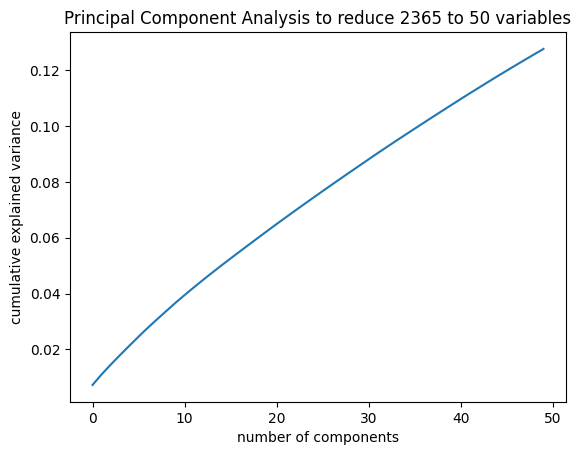

In [484]:
cleaned_df['host_response_rate'] = cleaned_df['host_response_rate'].astype(str).str.rstrip('%').astype('float') / 100.0
cleaned_df['host_acceptance_rate'] = cleaned_df['host_acceptance_rate'].astype(str).str.rstrip('%').astype('float') / 100.0

cleaned_df.drop(['host_verifications'], axis=1, inplace=True)

# cleaned_df.info()
cleaned_df.dtypes
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
# df.drop(['longitude','latitude'], axis=1, inplace=True)
X = np.array(cleaned_df.drop(['price'], axis = 1))
X_scaled = preprocessing.scale(X)
y =cleaned_df['price']
pca = PCA(n_components=50)
X_scaled = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Component Analysis to reduce 2365 to 50 variables')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')




In [485]:
#Recursicve Fearure Elimination



# cleaned_df.drop('host_verifications', axis=1, inplace=True)

from sklearn.feature_selection import RFECV 
from sklearn.tree import DecisionTreeRegressor 
  
# Create a decision tree classifier 
estimator = DecisionTreeRegressor() 
  
# Use RFE with cross-validation to  
# find the optimal number of features 
selector = RFECV(estimator, cv=5) 
y = cleaned_df['price']
selector = selector.fit(X_scaled, y) 
  
# Print the optimal number of features 
print("Optimal number of features: %d" % selector.n_features_) 
  
# Print the selected features 
print("Selected features: %s" % selector.support_) 

print("Feature Ranking: %s" % selector.ranking_)
#Print the selected columns names with its score and rank
selected_columns = []

for i in range(len(selector.ranking_)):
    if selector.ranking_[i] == 1:
        selected_columns.append(cleaned_df.columns[i])
        print(cleaned_df.columns[i], selector.ranking_[i])

# selected_columns

cleaned_df = cleaned_df[selected_columns]
cleaned_df




Optimal number of features: 43
Selected features: [ True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True False  True  True  True  True  True
  True False]
Feature Ranking: [1 1 1 1 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 8 1 1
 1 7 1 1 1 5 1 1 1 1 1 1 4]
host_response_rate 1
host_acceptance_rate 1
host_listings_count 1
host_total_listings_count 1
latitude 1
accommodates 1
bathrooms 1
beds 1
price 1
minimum_nights 1
maximum_nights 1
minimum_minimum_nights 1
maximum_minimum_nights 1
minimum_maximum_nights 1
maximum_maximum_nights 1
minimum_nights_avg_ntm 1
maximum_nights_avg_ntm 1
availability_30 1
availability_60 1
availability_90 1
availability_365 1
number_of_reviews_ltm 1
number_of_reviews_l30d 1
review_scores_rating 1
review_scores_accuracy 1
review_scores_cleanline

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,accommodates,bathrooms,beds,price,minimum_nights,...,days_since_first_review,days_since_host_since,"46"" HDTV with Netflix, Roku",Self check-in,Fast wifi – 532 Mbps,"42"" HDTV with Apple TV",Dial conditioner,"55"" HDTV with Disney+, Chromecast, Amazon Prime Video, Apple TV, Netflix","65"" HDTV with Amazon Prime Video, Apple TV, Chromecast, Netflix",Body wash body soap
0,1.00,0.98,2.0,2.0,45.519390,4.0,1.0,3.0,5.099866,2.0,...,4029,4066,0,1,0,0,0,0,0,0
1,1.00,0.98,2.0,2.0,45.519290,4.0,1.0,2.0,5.855072,2.0,...,3416,4066,0,1,0,0,0,0,0,0
2,0.94,0.80,8.0,11.0,45.530260,2.0,1.0,2.0,5.164786,32.0,...,2229,3797,0,0,0,0,0,0,0,0
3,0.78,0.00,1.0,3.0,45.526990,1.0,1.0,4.0,3.912023,31.0,...,3603,4008,0,0,0,0,0,0,0,0
4,1.00,1.00,2.0,3.0,45.541570,3.0,1.0,2.0,4.499810,3.0,...,3923,3946,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,1.00,1.00,6.0,17.0,45.495800,2.0,2.0,1.0,3.828641,31.0,...,-990,1886,0,0,0,0,0,0,0,0
8044,1.00,0.99,20.0,34.0,45.546685,10.0,2.0,5.0,5.198497,1.0,...,-990,-978,0,1,0,0,0,0,0,0
8050,1.00,1.00,10.0,11.0,45.557890,2.0,1.0,1.0,4.454347,1.0,...,-990,584,0,1,0,0,0,0,0,0
8054,1.00,1.00,4.0,4.0,45.544010,6.0,1.0,3.0,4.770685,1.0,...,-989,-566,0,0,0,0,0,0,0,0


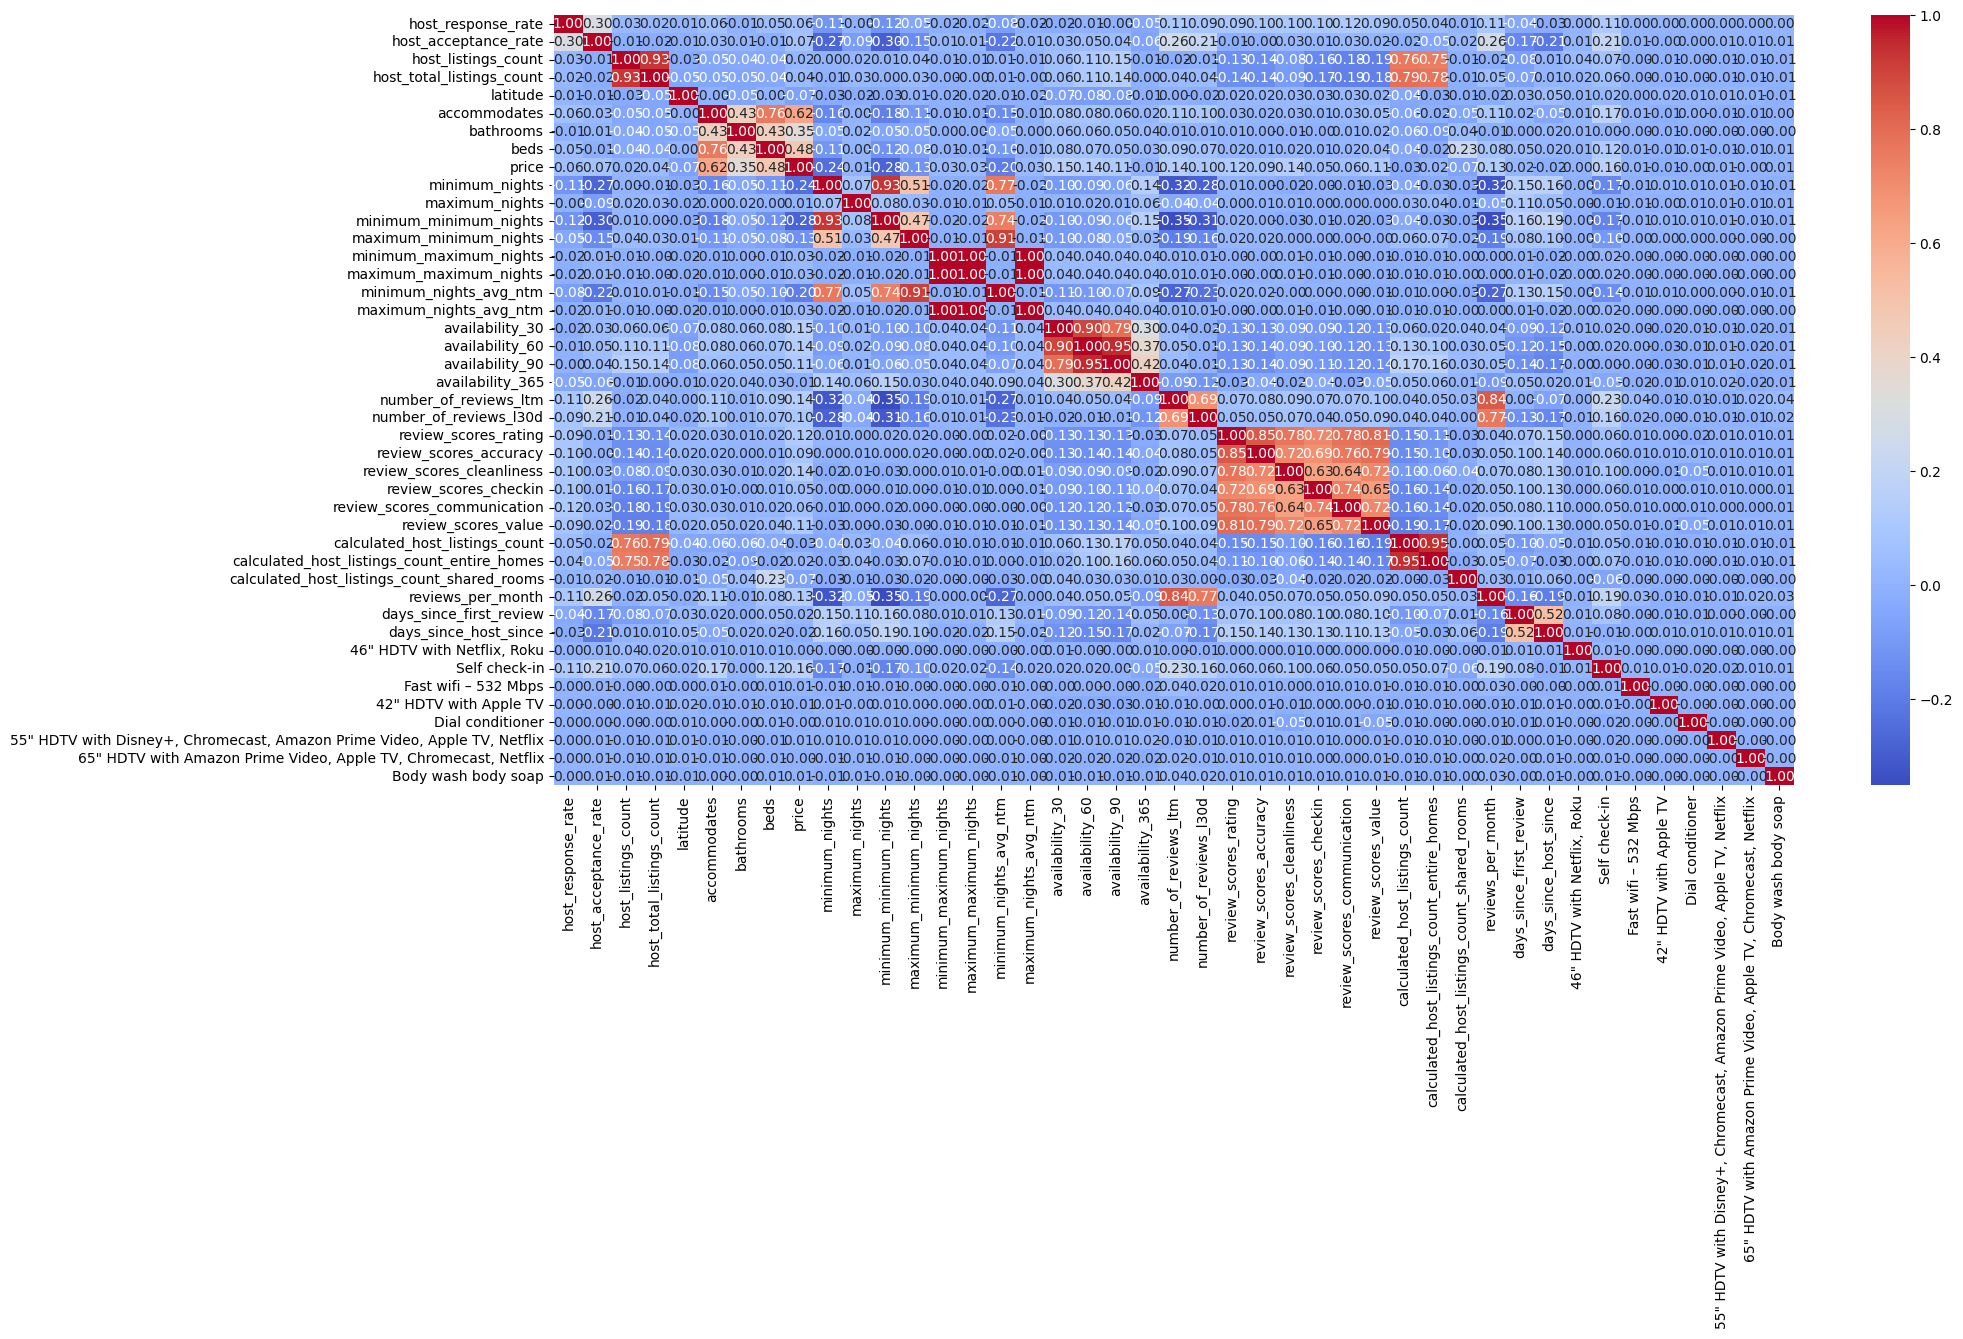

In [494]:
cleaned_df.corr()['price'].sort_values(ascending=False)
#show the correlation of the features with the target variable
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Modeling and Evaluuatuin


In [486]:
#Linear Regression
from sklearn.model_selection import train_test_split

X = cleaned_df.drop(['price'], axis=1)
y = cleaned_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.25088736616579027
Root Mean Squared Error: 0.500886580141443
R-squared: 0.4326962484792106


In [487]:
#Ridge Regression
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=0.5)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.25064909252081774
Root Mean Squared Error: 0.500648671745784
R-squared: 0.4332350302231751


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <6749C431-FD87-3912-A7CF-11CB9194D072> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
